In [10]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Create URL to Excel file (alternatively this can be a filepath)
url = 'http://ir.eia.gov/ngs/ngshistory.xls'
# Load the first sheet of the Excel file into a data frame
natgasstorEIA_df_full = pd.read_excel(url)

# Remove unwanted information
new_header = natgasstorEIA_df_full.iloc[5] #grab the first row for the header
natgasstorEIA_df_full = natgasstorEIA_df_full[6:] #take the data less the header row
natgasstorEIA_df_full.columns = new_header #set the header row as the df header
del natgasstorEIA_df_full['Source'] #useless column
#reset the index
natgasstorEIA_df_full = natgasstorEIA_df_full.reset_index()
#Turn objects into dates & numbers
natgasstorEIA_df_full['Week ending'] = pd.to_datetime(natgasstorEIA_df_full['Week ending'])
natgasstorEIA_df_full['East Region']= natgasstorEIA_df_full['East Region'].astype(str).astype(int)
natgasstorEIA_df_full['Midwest Region']= natgasstorEIA_df_full['Midwest Region'].astype(str).astype(int)
natgasstorEIA_df_full['Mountain Region']= natgasstorEIA_df_full['Mountain Region'].astype(str).astype(int)
natgasstorEIA_df_full['Pacific Region']= natgasstorEIA_df_full['Pacific Region'].astype(str).astype(int)
natgasstorEIA_df_full['South Central Region']= natgasstorEIA_df_full['South Central Region'].astype(str).astype(int)
natgasstorEIA_df_full['Salt']= natgasstorEIA_df_full['Salt'].astype(str).astype(int)
natgasstorEIA_df_full['NonSalt']= natgasstorEIA_df_full['NonSalt'].astype(str).astype(int)
natgasstorEIA_df_full['Total Lower 48']= natgasstorEIA_df_full['Total Lower 48'].astype(str).astype(int)
# Create new columns to break up into years/months/days
natgasstorEIA_df_full['day'] = natgasstorEIA_df_full['Week ending'].dt.day
natgasstorEIA_df_full['month'] = natgasstorEIA_df_full['Week ending'].dt.month
natgasstorEIA_df_full['year'] = natgasstorEIA_df_full['Week ending'].dt.year
#Create a week number column
natgasstorEIA_df_full['Week_Number'] = natgasstorEIA_df_full['Week ending'].dt.week
#resort the columns
natgasstorEIA_df_full = natgasstorEIA_df_full[["Week ending", "year", "month","day","Week_Number","East Region","Midwest Region", "Mountain Region","Pacific Region","South Central Region","Salt","NonSalt","Total Lower 48"]]
# View the dataframe
natgasstorEIA_df_full





5,Week ending,year,month,day,Week_Number,East Region,Midwest Region,Mountain Region,Pacific Region,South Central Region,Salt,NonSalt,Total Lower 48
0,2010-01-01,2010,1,1,53,769,900,195,268,985,159,826,3117
1,2010-01-08,2010,1,8,1,703,820,185,257,886,123,763,2850
2,2010-01-15,2010,1,15,2,642,750,176,246,793,91,702,2607
3,2010-01-22,2010,1,22,3,616,710,171,235,789,102,687,2521
4,2010-01-29,2010,1,29,4,582,661,164,221,779,108,671,2406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2020-08-28,2020,8,28,35,789,924,212,304,1225,331,895,3455
557,2020-09-04,2020,9,4,36,805,953,216,308,1243,335,908,3525
558,2020-09-11,2020,9,11,37,825,983,221,310,1276,349,927,3614
559,2020-09-18,2020,9,18,38,851,1009,225,312,1283,349,934,3680


In [18]:
# Drop Week 53
natgasstorEIA_df = natgasstorEIA_df_full.loc[natgasstorEIA_df_full['Week_Number'] != 53]

In [19]:
#Create the table that will allow a person to create %full bar charts for all the regions

#Find the Max for each Region and overall, should help build the storage containers for bar charts
ERegionMax = natgasstorEIA_df["East Region"].max()
MWRegionMax = natgasstorEIA_df["Midwest Region"].max()
MntRegionMax = natgasstorEIA_df["Mountain Region"].max()
PACRegionMax = natgasstorEIA_df["Pacific Region"].max()
SCentRegionMax = natgasstorEIA_df["South Central Region"].max()
SaltMax = natgasstorEIA_df["Salt"].max()
NonSaltMax = natgasstorEIA_df["NonSalt"].max()
Lower48Max = natgasstorEIA_df["Total Lower 48"].max()
# initialize list of lists 
MaxStorage = [['East', ERegionMax],
              ['MidWest', MWRegionMax],
              ['Mountain', MntRegionMax],
              ['Pacific', PACRegionMax],
              ['South Central', SCentRegionMax],
              ['Salt', SaltMax],
              ['Non-Salt', NonSaltMax],
              ['Lower48', Lower48Max]]
# Create the pandas DataFrame 
MaxStorage_df = pd.DataFrame(MaxStorage, columns = ['Region', 'Max Storage']) 
#Get the current data from the EIA
natgasrecent_df = pd.DataFrame(natgasstorEIA_df.tail(1))
natgasrecent_df
#Set the current storage numbers.
ERegionCurrent = natgasrecent_df.iloc[0, 5]
MWRegionCurrent = natgasrecent_df.iloc[0, 6]
MntRegionCurrent = natgasrecent_df.iloc[0, 7]
PACRegionCurrent = natgasrecent_df.iloc[0, 8]
SCentRegionCurrent = natgasrecent_df.iloc[0, 9]
SaltCurrent = natgasrecent_df.iloc[0, 10]
NonSaltCurrent = natgasrecent_df.iloc[0, 11]
Lower48Current = natgasrecent_df.iloc[0, 12]
#Create the list to place into the data frame.
Current = [ERegionCurrent,MWRegionCurrent,MntRegionCurrent,PACRegionCurrent,SCentRegionCurrent,SaltCurrent,NonSaltCurrent,Lower48Current]
MaxStorage_df ['Current Storage'] = Current
#Create columns that show empty space (to build a stacked bar), and percentage full
MaxStorage_df['Empty Space'] = MaxStorage_df['Max Storage']-MaxStorage_df['Current Storage']
MaxStorage_df['% full'] = MaxStorage_df['Current Storage']/MaxStorage_df['Max Storage']
MaxStorage_df

,Region,Max Storage,Current Storage,Empty Space,% full
0,East,960,872,88,0.908333
1,MidWest,1155,1033,122,0.894372
2,Mountain,259,231,28,0.891892
3,Pacific,386,316,70,0.818653
4,South Central,1370,1304,66,0.951825
5,Salt,403,358,45,0.888337
6,Non-Salt,1006,945,61,0.939364
7,Lower48,4047,3756,291,0.928095


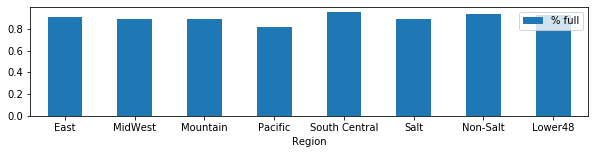

In [25]:
ax = MaxStorage_df.plot.bar(x='Region', y='% full', rot=0, figsize=(10,2))

In [32]:
#Starting to get the info to create a line graph that captures the min/max as a shadow.

grouped_week_df = natgasstorEIA_df.groupby(['Week_Number'])
ERegionMax_byweek = grouped_week_df["East Region"].max()
ERegionMin_byweek = grouped_week_df["East Region"].min()
ERegionAvg_byweek = grouped_week_df["East Region"].mean()
MWRegionMax_byweek = grouped_week_df["Midwest Region"].max()
MWRegionMin_byweek = grouped_week_df["Midwest Region"].min()
MWRegionAvg_byweek = grouped_week_df["Midwest Region"].mean()
MntRegionMax_byweek = grouped_week_df["Mountain Region"].max()
MntRegionMin_byweek = grouped_week_df["Mountain Region"].min()
MntRegionAvg_byweek = grouped_week_df["Mountain Region"].mean()
PACRegionMax_byweek = grouped_week_df["Pacific Region"].max()
PACRegionMin_byweek = grouped_week_df["Pacific Region"].min()
PACRegionAvg_byweek = grouped_week_df["Pacific Region"].mean()
SCentRegionMax_byweek = grouped_week_df["South Central Region"].max()
SCentRegionMin_byweek = grouped_week_df["South Central Region"].min()
SCentRegionAvg_byweek = grouped_week_df["South Central Region"].mean()
SaltMax_byweek = grouped_week_df["Salt"].max()
SaltMin_byweek = grouped_week_df["Salt"].min()
SaltAvg_byweek = grouped_week_df["Salt"].mean()
NonSaltMax_byweek = grouped_week_df["NonSalt"].max()
NonSaltMin_byweek = grouped_week_df["NonSalt"].min()
NonSaltAvg_byweek = grouped_week_df["NonSalt"].mean()
Lower48Max_byweek = grouped_week_df["Total Lower 48"].max()
Lower48Min_byweek = grouped_week_df["Total Lower 48"].min()
Lower48Avg_byweek = grouped_week_df["Total Lower 48"].mean()

(0, 4500)

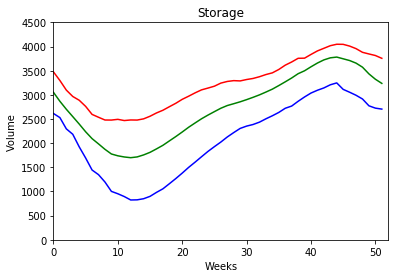

In [33]:
Lower48Max_byweek_list = Lower48Max_byweek.to_list()
Lower48Min_byweek_list = Lower48Min_byweek.to_list()
Lower48Avg_byweek_list = Lower48Avg_byweek.to_list()
# Create a DataFrame of frames using a dictionary of lists
Lower48Max_byweek_list_df = pd.DataFrame({
    "Max": Lower48Max_byweek_list,
    "Min": Lower48Min_byweek_list,
    "Avg": Lower48Avg_byweek_list
})
# Plot the charts and apply some styling
weeks = np.arange(0,52,1)
Max, = plt.plot(weeks, Lower48Max_byweek_list_df["Max"], color="red", label="Max")
Min, = plt.plot(weeks, Lower48Max_byweek_list_df["Min"], color="blue", label="Min")
Avg, = plt.plot(weeks, Lower48Max_byweek_list_df["Avg"], color="green", label="Avg")
# Add labels to X and Y axes :: Add title
plt.title("Storage")
plt.xlabel("Weeks")
plt.ylabel("Volume")
# Set the limits for the X and Y axes
plt.xlim(0,52)
plt.ylim(0,4500)


In [133]:
# Let's load a couple of libraries that we need.
# This will usually go in the first cell at the top,
# but I have it here to keep all my code in one place so you know what's new

# Datetime has a set of date/time related functions.
# In this case, we use it to fetch the current date/week
import datetime

# This is a matplotlib utility function that converts 0 -> 1 into % values
import matplotlib.ticker as mtick


# Instead of repeating the same code for every region let's create
# a function / template that takes in a region name and 
# prints out the relevant chart.

def renderChart(region):

  # Find the current volume for this region(last row)
  currentVol = int(natgasstorEIA_df.tail(1)[region])
    
  # Calculate the % and convert it to an integer
  currentPct = int(currentVol / natgasstorEIA_df[region].max() * 100)

  # Fetch the Current week number and current year.
  # datetime.datetime.today().isocalendar() returns the 
  # current year, week no. and day of the week as a number.
  # eg. (2020, 27, 4)
  #  
  # Indices start at 0, so the year is at [0]
  # and weekno. is at [1]
  currentWeek = datetime.datetime.today().isocalendar()[1]
  currentYear = datetime.datetime.today().isocalendar()[0]

  # Fetch all rows that match our current week number
  historicWeeks_df = natgasstorEIA_df.loc[natgasstorEIA_df['Week_Number'] == currentWeek]

  # Set empty df's for looping
  column_names = natgasstorEIA_df.head(0)
  plus8_df = pd.DataFrame(columns=column_names)
  past3years_df = pd.DataFrame(columns=column_names)

  # Fetch all rows that match our current week number
  for z in range(1,9):
      find8 = natgasstorEIA_df.loc[natgasstorEIA_df.Week_Number == currentWeek + z]
      plus8_df = plus8_df.append(find8)

  # Keep the past 3 years of data for the next 8 weeks
  minusy1_df = plus8_df.loc[plus8_df.year == currentYear - 1]
  minusy2_df = plus8_df.loc[plus8_df.year == currentYear - 2]
  minusy3_df = plus8_df.loc[plus8_df.year == currentYear - 3]
  
  # Let's build the table we want displayed
  StatsTable_df = pd.DataFrame([['Current %', currentPct],
                                ['Current Vol', currentVol],
                                ['Average Vol', int(historicWeeks_df[region].mean())],
                                ['Max', int(historicWeeks_df[region].max())],
                                ['Min', int(historicWeeks_df[region].min())]])


  # Since we want 3 charts(including the table) side-by-side, we need to create
  # a grid of subplots with nrows = 1 and ncols = 3.
  # figsize controls the height and width of the overall chart.
  # gridspec_kw lets us configure various grid related params. Here, we're setting
  # the ratio of the width of the 3 charts.
  #
  # The master chart is 'fig' and the three subplots are 'ax_1' through 'ax_3'.
  fig, (ax_1, ax_2, ax_3) = plt.subplots(nrows=1, ncols=3, figsize=(25,5), gridspec_kw={'width_ratios': [2, 3, 9]})

  # ax_1 - A simple bar chart
  # The first parameter is a list of indices(since we have just one value, let's set it to 0)
  # The second parameter is our solitary value.
  ax_1.bar([0], [currentPct])
    
  # Stretch the axes out, otherwise, matplotlib resizes the axes to fit the data.
  ax_1.axis([0.1, 0, 0, 100])
    
  # Render % labels in the Y axis
  ax_1.yaxis.set_major_formatter(mtick.PercentFormatter(100))
    
  ax_1.set_xlabel("Current %")
  ax_1.set_xticklabels('')


  # ax_2 - Render our table as a chart
  # cellText = values
  # loc = Location/alignment
  # bbox = set position and dimentions of the chart
  ax_2.table(cellText=StatsTable_df.values, loc='center', bbox=[-0.1, 0, 1, 1])

  # Turn axes off as we don't need them for a table.
  ax_2.axis('off')

  # ax_3 - Line charts
  natgasstorEIA_df.loc[natgasstorEIA_df['year'] == currentYear].plot.line(x='Week_Number',
                                                                          y=region,
                                                                          ax=ax_3,
                                                                          label="Current")
  grouped_week_df[region].max().plot.line(x='Week_Number',
                                                    y=region,
                                                    ax=ax_3,
                                                    label="Max")
  grouped_week_df[region].min().plot.line(x='Week_Number',
                                                    y=region,
                                                    ax=ax_3,
                                                    label="Min")
  minusy1_df.plot.line(x='Week_Number',
                                  y=region,
                                  ax=ax_3,
                                  label="Minus-1")
  minusy2_df.plot.line(x='Week_Number',
                                  y=region,
                                  ax=ax_3,
                                  label="Minus-2")
  minusy3_df.plot.line(x='Week_Number',
                                  y=region,
                                  ax=ax_3,
                                  label="Minus-3")
    
  ax_3.set_xlabel(' ')
  ax_3.legend()


  # Set title for the overall chart
  fig.suptitle(region)
  plt.show()


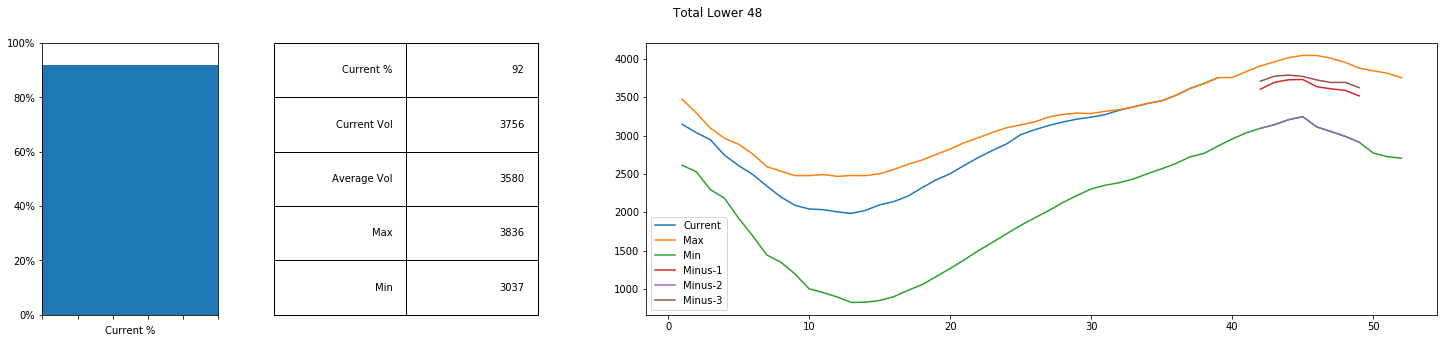

In [134]:
renderChart('Total Lower 48')

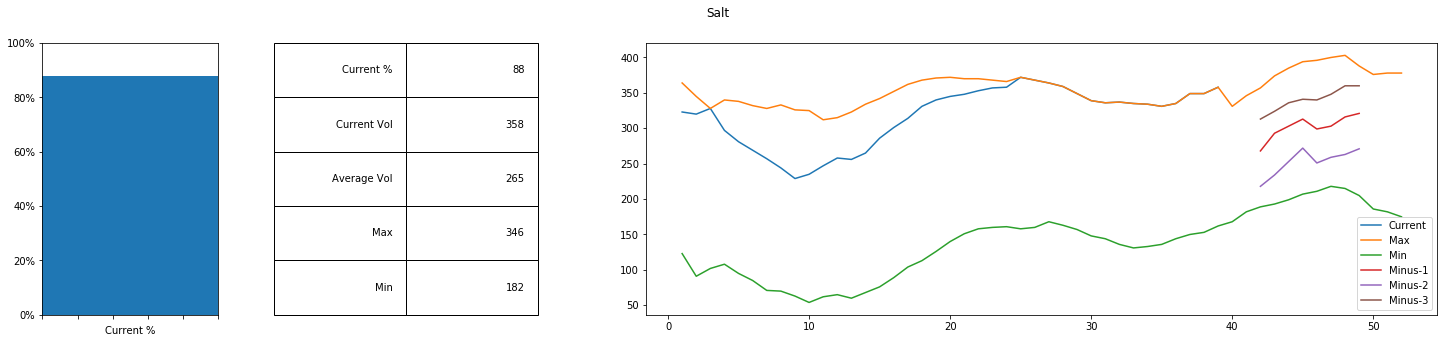

In [135]:
renderChart('Salt')

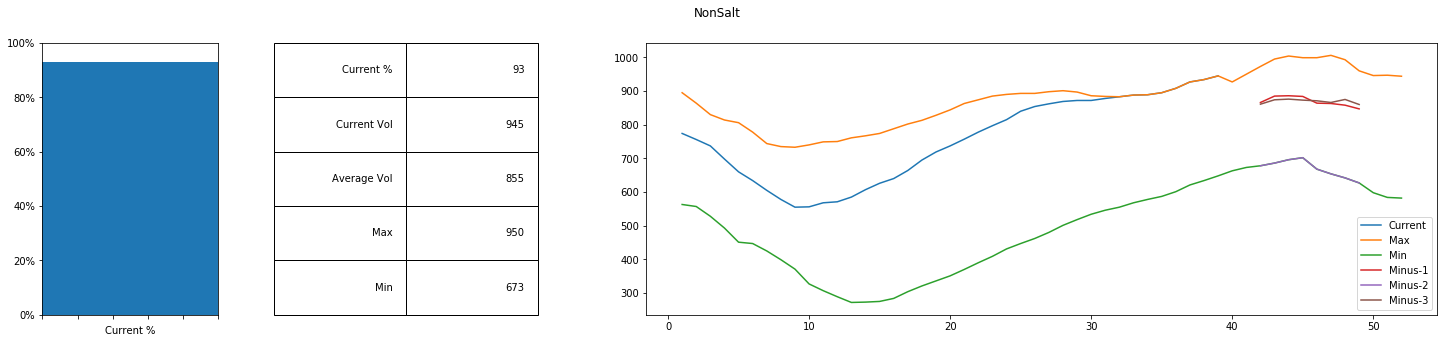

In [136]:
renderChart('NonSalt')

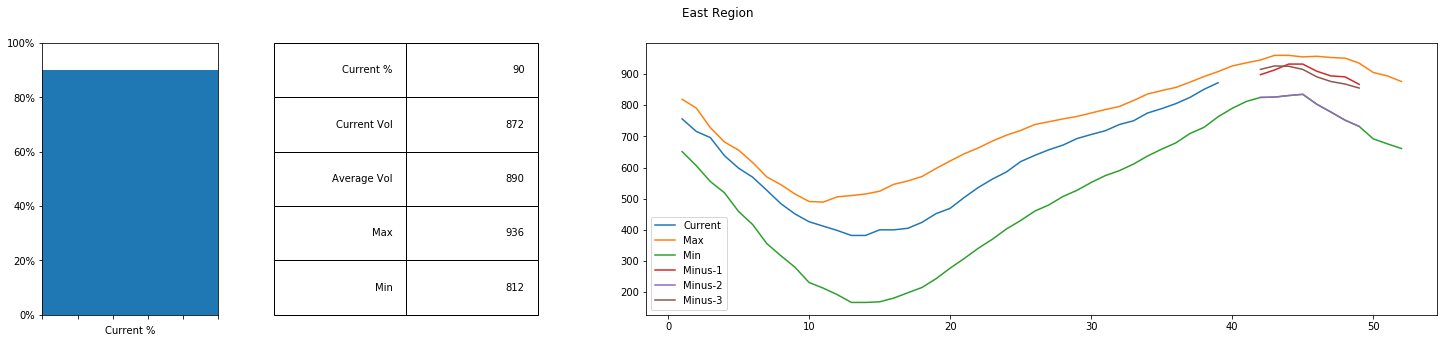

In [137]:
renderChart('East Region')

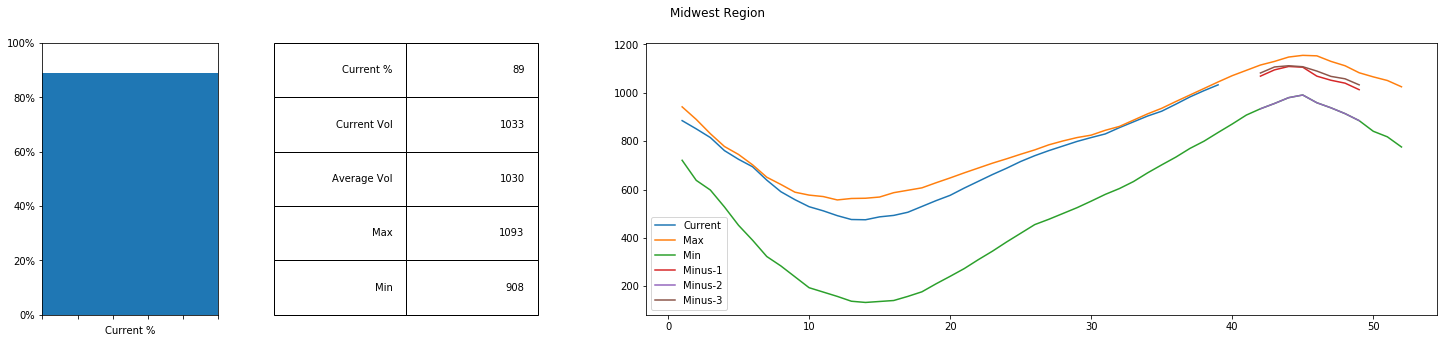

In [138]:
renderChart('Midwest Region')

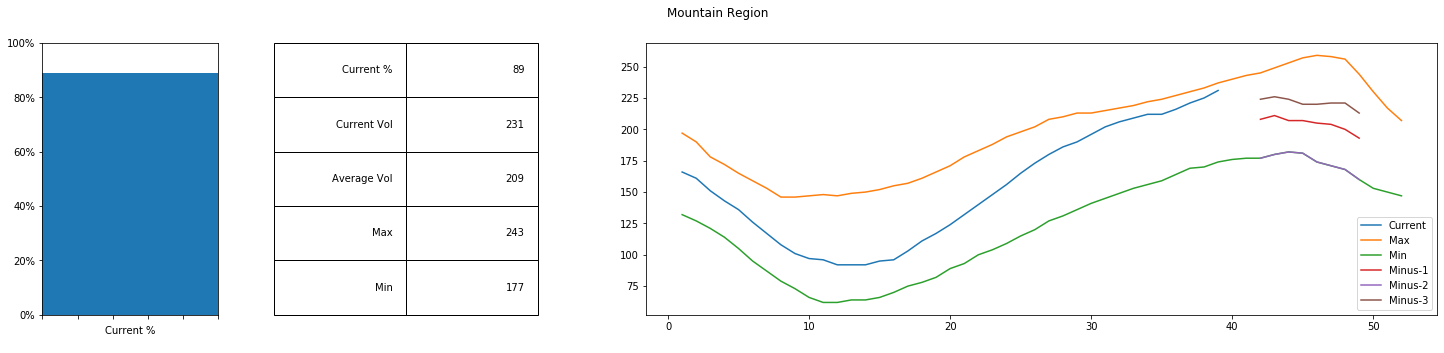

In [139]:
renderChart('Mountain Region')

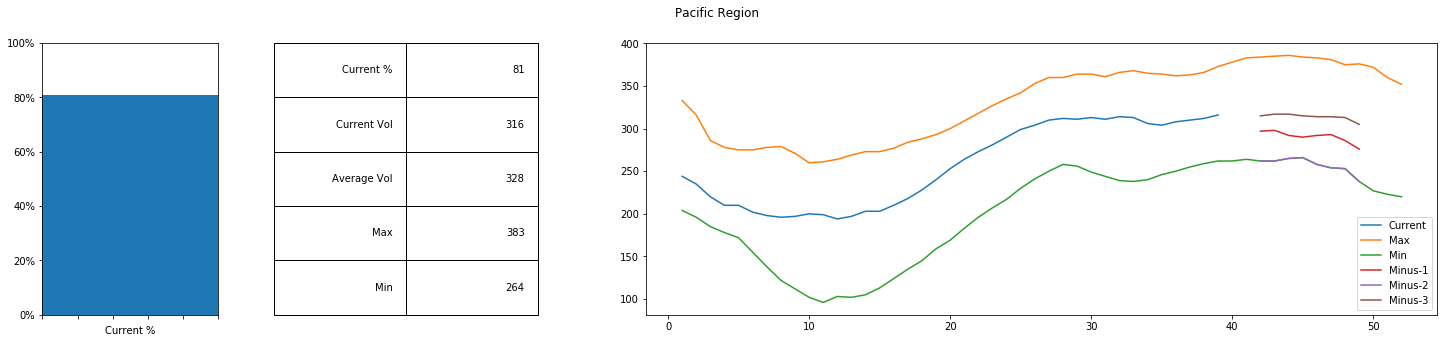

In [140]:
renderChart('Pacific Region')

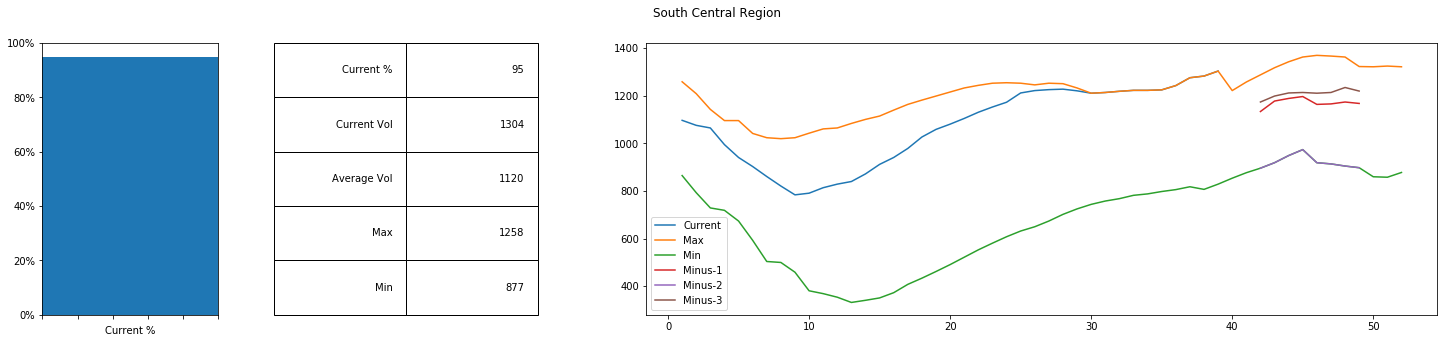

In [141]:
renderChart('South Central Region')